# ggplot

ggplot is a Python version of the R graphics library, ggplot2. When this page was being written, it didn't yet have all of the  features of ggplot2; to see the latest news, check out ggplot's [project page]( https://pypi.python.org/pypi/ggplot/).  To install ggplot, go to a command line – e.g., in Windows 7, click the Start button and type "cmd" – and type:

pip install ggplot

To use ggplot, you'll need the following code:

In [1]:
import pandas as pd
from ggplot import *

# Although it says matplotlib, it tells the notebook to print ggplot plots in the notebook (vs a popup box)
%matplotlib inline

_{ Right now, this page is just a dump of the examples on the [project page]( https://pypi.python.org/pypi/ggplot/) plus a [brief intro](http://blog.yhathq.com/posts/ggplot-for-python.html) and a post on [plotting time series data](http://blog.yhathq.com/posts/aggregating-and-plotting-time-series-in-python.html) by yhat. I need to turn these into proper recipes. }_

NOTE: the data used in these recipes is included in the ggplot library.

## Histogram

In [3]:
a = [1, 1, 2, 1, 1, 4, 5, 6]
df = pd.DataFrame(a, columns=['a'])

p = ggplot(aes(x='a'), data=df)
p + geom_histogram(binwidth=1)

<ggplot: (24656525)>

<ggplot: (24656479)>

binwidth defaulted to range/30. Use 'binwidth = x' to adjust this.


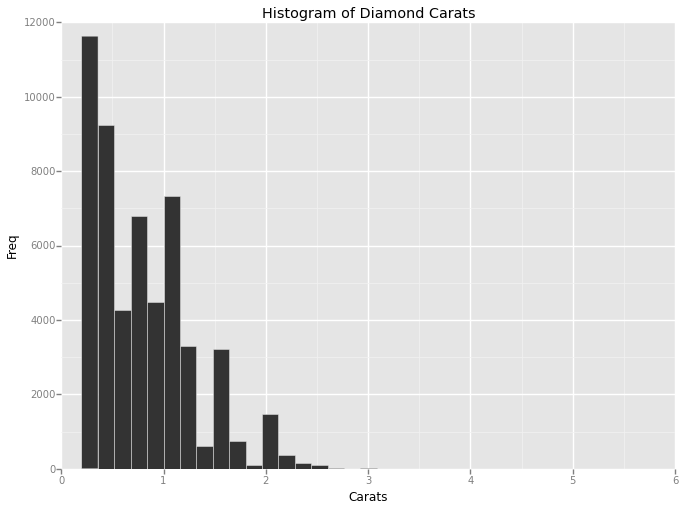

<ggplot: (24822311)>

In [4]:
p = ggplot(aes(x='carat'), data=diamonds)
p + geom_histogram() + ggtitle("Histogram of Diamond Carats") + labs("Carats", "Freq")

## Bar Chart

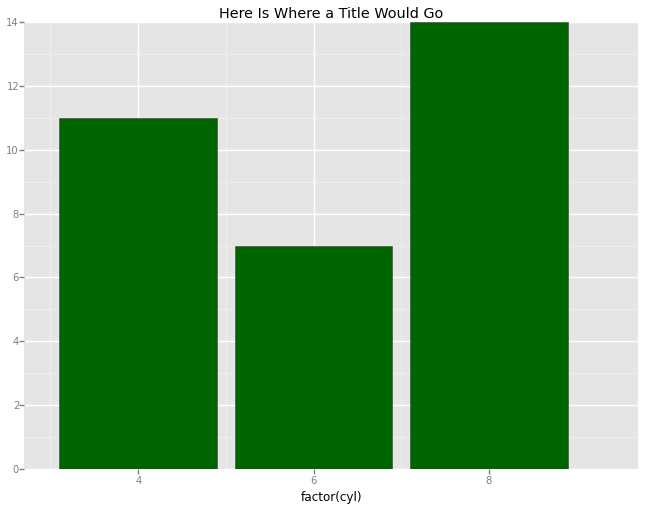

<ggplot: (24822318)>

In [5]:
p = ggplot(mtcars, aes('factor(cyl)'))
p + geom_bar(fill = "darkgreen") +    ggtitle("Here Is Where a Title Would Go") 

## Density Plot

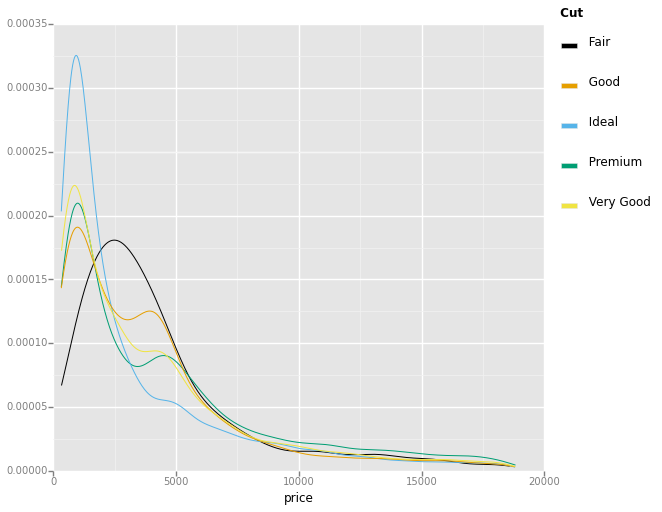

<ggplot: (24814578)>

In [6]:
ggplot(diamonds, aes(x='price', color='cut')) + \
    geom_density()

## Scatter Plot

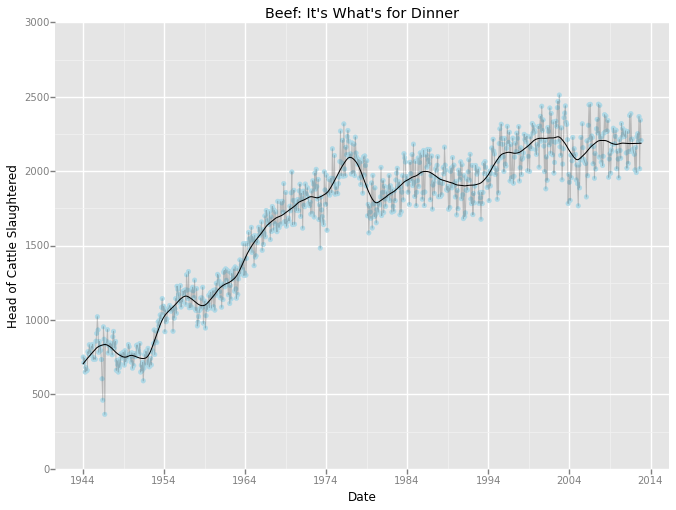

<ggplot: (24900591)>

In [7]:
ggplot(aes(x='date', y='beef'), data=meat) + \
    geom_point(color='lightblue') + \
    geom_line(alpha=0.25) + \
    stat_smooth(span=.05, color='black') + \
    ggtitle("Beef: It's What's for Dinner") + \
    xlab("Date") + \
    ylab("Head of Cattle Slaughtered")

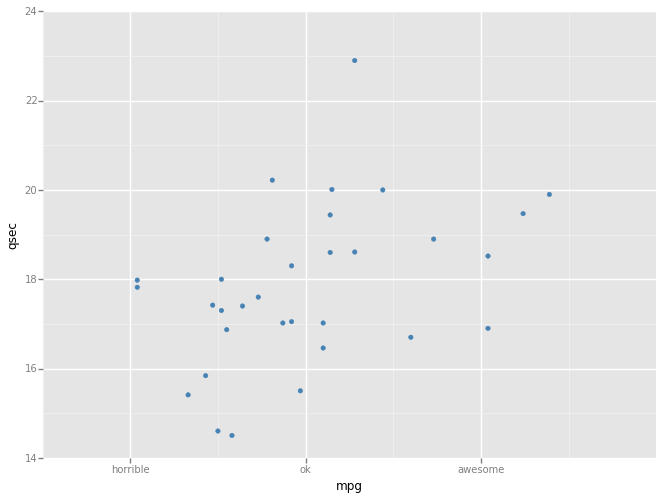

<ggplot: (25362331)>


In [8]:
print ggplot(mtcars, aes('mpg', 'qsec')) + \
  geom_point(colour='steelblue') + \
  scale_x_continuous(breaks=[10,20,30],  \
                    labels=["horrible", "ok", "awesome"])

In [9]:
meat

In [10]:
meat_long = pd.melt(meat[['date', 'beef', 'pork', 'broilers']], id_vars='date', var_name= 'meat_type')
meat_long

date meat_type  value
0  1944-01-01      beef    751
1  1944-02-01      beef    713
2  1944-03-01      beef    741
3  1944-04-01      beef    650
4  1944-05-01      beef    681
5  1944-06-01      beef    658
6  1944-07-01      beef    662
7  1944-08-01      beef    787
8  1944-09-01      beef    774
9  1944-10-01      beef    834
10 1944-11-01      beef    786
11 1944-12-01      beef    764
12 1945-01-01      beef    820
13 1945-02-01      beef    816
14 1945-03-01      beef    836
15 1945-04-01      beef    736
16 1945-05-01      beef    747
17 1945-06-01      beef    739
18 1945-07-01      beef    736
19 1945-08-01      beef    858
20 1945-09-01      beef    910
21 1945-10-01      beef   1022
22 1945-11-01      beef    933
23 1945-12-01      beef    783
24 1946-01-01      beef    856
25 1946-02-01      beef    827
26 1946-03-01      beef    796
27 1946-04-01      beef    734
28 1946-05-01      beef    605
29 1946-06-01      beef    461
30 1946-07-01      beef    954
31 1946-08-01      beef    871
32 1946-09-01      beef    366
33 1946-10-01      beef    840
34 1946-11-01      beef    844
35 1946-12-01      beef    856
36 1947-01-01      beef    935
37 1947-02-01      beef    778
38 1947-03-01      beef    829
39 1947-04-01      beef    831
40 1947-05-01      beef    846
41 1947-06-01      beef    804
42 1947-07-01      beef    839
43 1947-08-01      beef    766
44 1947-09-01      beef    888
45 1947-10-01      beef    924
46 1947-11-01      beef    813
47 1947-12-01      beef    843
48 1948-01-01      beef    856
49 1948-02-01      beef    662
50 1948-03-01      beef    727
51 1948-04-01      beef    700
52 1948-05-01      beef    650
53 1948-06-01      beef    733
54 1948-07-01      beef    681
55 1948-08-01      beef    705
56 1948-09-01      beef    773
57 1948-10-01      beef    752
58 1948-11-01      beef    744
59 1948-12-01      beef    783
          ...       ...    ...

[2481 rows x 3 columns]

In [11]:
ggplot(aes(x='date', y='value', colour='meat_type'), data=meat_long) + \
    geom_point() + \
    stat_smooth(color='red')

<ggplot: (24818036)>

## Line Graph

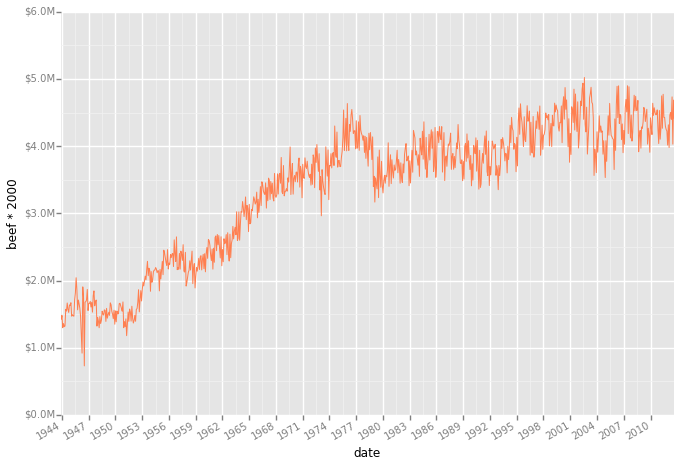

<ggplot: (24824626)>


In [12]:
print ggplot(meat, aes('date','beef * 2000')) + \
    geom_line(color='coral') + \
    scale_x_date(breaks=date_breaks('36 months'), labels='%Y') + \
    scale_y_continuous(labels='millions')

## Faceting

Suppose you want to print one graph per field value {got to come up with a better way of describing this}. For example, suppose you had the following data:

In [13]:
meat_long = pd.melt(meat, id_vars=['date'], var_name='meat_type')
meat_long

date meat_type  value
0  1944-01-01      beef    751
1  1944-02-01      beef    713
2  1944-03-01      beef    741
3  1944-04-01      beef    650
4  1944-05-01      beef    681
5  1944-06-01      beef    658
6  1944-07-01      beef    662
7  1944-08-01      beef    787
8  1944-09-01      beef    774
9  1944-10-01      beef    834
10 1944-11-01      beef    786
11 1944-12-01      beef    764
12 1945-01-01      beef    820
13 1945-02-01      beef    816
14 1945-03-01      beef    836
15 1945-04-01      beef    736
16 1945-05-01      beef    747
17 1945-06-01      beef    739
18 1945-07-01      beef    736
19 1945-08-01      beef    858
20 1945-09-01      beef    910
21 1945-10-01      beef   1022
22 1945-11-01      beef    933
23 1945-12-01      beef    783
24 1946-01-01      beef    856
25 1946-02-01      beef    827
26 1946-03-01      beef    796
27 1946-04-01      beef    734
28 1946-05-01      beef    605
29 1946-06-01      beef    461
30 1946-07-01      beef    954
31 1946-08-01      beef    871
32 1946-09-01      beef    366
33 1946-10-01      beef    840
34 1946-11-01      beef    844
35 1946-12-01      beef    856
36 1947-01-01      beef    935
37 1947-02-01      beef    778
38 1947-03-01      beef    829
39 1947-04-01      beef    831
40 1947-05-01      beef    846
41 1947-06-01      beef    804
42 1947-07-01      beef    839
43 1947-08-01      beef    766
44 1947-09-01      beef    888
45 1947-10-01      beef    924
46 1947-11-01      beef    813
47 1947-12-01      beef    843
48 1948-01-01      beef    856
49 1948-02-01      beef    662
50 1948-03-01      beef    727
51 1948-04-01      beef    700
52 1948-05-01      beef    650
53 1948-06-01      beef    733
54 1948-07-01      beef    681
55 1948-08-01      beef    705
56 1948-09-01      beef    773
57 1948-10-01      beef    752
58 1948-11-01      beef    744
59 1948-12-01      beef    783
          ...       ...    ...

[6616 rows x 3 columns]

To break them down by meat_type:

In [14]:
p = ggplot(aes(x='date', y='value'), data=meat_long)
p + geom_point() + stat_smooth(colour="red") + \
    facet_wrap("meat_type")

<ggplot: (25333277)>

To facet the information by 2 variables:

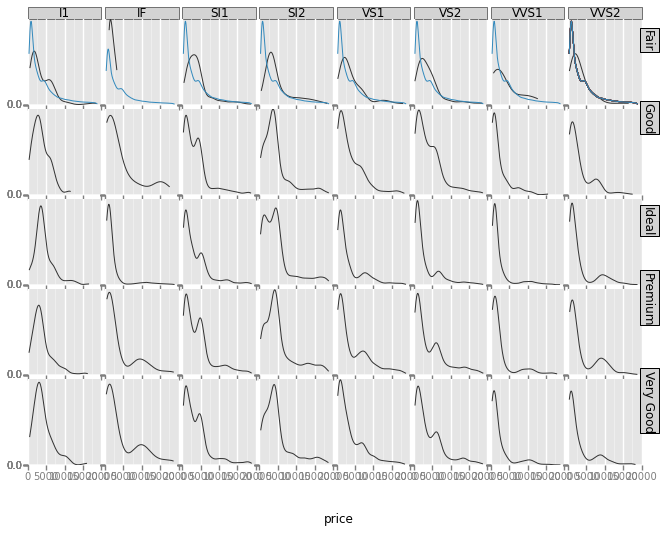

<ggplot: (27263127)>

In [15]:
h = ggplot(diamonds, aes(x='price'))
h + geom_density() + \
    facet_grid("cut", "clarity")